# Chronic Kidney  Disease

## Data Description ##
Overview, Chronic kidney disease, also called chronic kidney failure, describes the gradual loss of kidney function. Your kidneys filter wastes and excess fluids from your blood, which are then excreted in your urine. When chronic kidney disease reaches an advanced stage, dangerous levels of fluid, electrolytes and wastes can build up in your body.

I got this data from UCI dataset. We have a 400 patients w/ medical records including the labolatory test taken in two montsh period. This has 26 column describe below and 400 rows which are the number of patients.

### Attribute Information: ###

We use 24 + class = 25 ( 11 numeric ,14 nominal) 
1. Age(numerical) 
age in years 
2. Blood Pressure(numerical) 
bp in mm/Hg 
3. Specific Gravity(nominal) 
sg - (1.005,1.010,1.015,1.020,1.025) 
4. Albumin(nominal) 
al - (0,1,2,3,4,5) 
5. Sugar(nominal) 
su - (0,1,2,3,4,5) 
6. Red Blood Cells(nominal) 
rbc - (normal,abnormal) 
7. Pus Cell (nominal) 
pc - (normal,abnormal) 
8. Pus Cell clumps(nominal) 
pcc - (present,notpresent) 
9. Bacteria(nominal) 
ba - (present,notpresent) 
10. Blood Glucose Random(numerical)	
bgr in mgs/dl 
11. Blood Urea(numerical)	
bu in mgs/dl 
12. Serum Creatinine(numerical)	
sc in mgs/dl 
13. Sodium(numerical) 
sod in mEq/L 
14. Potassium(numerical)	
pot in mEq/L 
15. Hemoglobin(numerical) 
hemo in gms 
16. Packed Cell Volume(numerical) 
17. White Blood Cell Count(numerical) 
wc in cells/cumm 
18. Red Blood Cell Count(numerical)	
rc in millions/cmm 
19. Hypertension(nominal)	
htn - (yes,no) 
20. Diabetes Mellitus(nominal)	
dm - (yes,no) 
21. Coronary Artery Disease(nominal) 
cad - (yes,no) 
22. Appetite(nominal)	
appet - (good,poor) 
23. Pedal Edema(nominal) 
pe - (yes,no)	
24. Anemia(nominal) 
ane - (yes,no) 
25. Class (nominal)	
class - (ckd,notckd)




## Import Libraries

In [1]:
%matplotlib inline
import pandas as pd
import numpy as np
import seaborn as sns
sns.set_style("whitegrid")
from matplotlib import pyplot as plt
from scipy import stats

from sklearn import ensemble
from sklearn import datasets
from sklearn.utils import shuffle
from sklearn.metrics import mean_squared_error



## Explore the data

In [2]:
#Download data to DataFrame
df_kidney=pd.read_csv('kidney_disease.csv')
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)
df_kidney.head()

,id,age,bp,sg,al,su,rbc,pc,pcc,ba,bgr,bu,sc,sod,pot,hemo,pcv,wc,rc,htn,dm,cad,appet,pe,ane,classification
0,0,48.0,80.0,1.020,1.0,0.0,NaN,normal,notpresent,notpresent,121.0,36.0,1.2,NaN,NaN,15.4,44,7800,5.2,yes,yes,no,good,no,no,ckd
1,1,7.0,50.0,1.020,4.0,0.0,NaN,normal,notpresent,notpresent,NaN,18.0,0.8,NaN,NaN,11.3,38,6000,NaN,no,no,no,good,no,no,ckd
2,2,62.0,80.0,1.010,2.0,3.0,normal,normal,notpresent,notpresent,423.0,53.0,1.8,NaN,NaN,9.6,31,7500,NaN,no,yes,no,poor,no,yes,ckd
3,3,48.0,70.0,1.005,4.0,0.0,normal,abnormal,present,notpresent,117.0,56.0,3.8,111.0,2.5,11.2,32,6700,3.9,yes,no,no,poor,yes,yes,ckd
4,4,51.0,80.0,1.010,2.0,0.0,normal,normal,notpresent,notpresent,106.0,26.0,1.4,NaN,NaN,11.6,35,7300,4.6,no,no,no,good,no,no,ckd


In [3]:
#Check number of rows and columns
df_kidney.shape

(400, 26)

In [4]:
df_kidney.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 400 entries, 0 to 399
Data columns (total 26 columns):
id                400 non-null int64
age               391 non-null float64
bp                388 non-null float64
sg                353 non-null float64
al                354 non-null float64
su                351 non-null float64
rbc               248 non-null object
pc                335 non-null object
pcc               396 non-null object
ba                396 non-null object
bgr               356 non-null float64
bu                381 non-null float64
sc                383 non-null float64
sod               313 non-null float64
pot               312 non-null float64
hemo              348 non-null float64
pcv               330 non-null object
wc                295 non-null object
rc                270 non-null object
htn               398 non-null object
dm                398 non-null object
cad               398 non-null object
appet             399 non-null object
pe         

In [5]:
#Rename long column name to short name
df_kidney.rename(columns={'classification':'classi'}, inplace=True)

In [6]:
# Remove unusaul values
df_kidney=df_kidney.replace(to_replace='?', value=None)
df_kidney=df_kidney.replace(to_replace='\t?', value=None)


In [7]:
for col in df_kidney.columns:
    if df_kidney[col].dtype == 'object':
        df_kidney[col]=df_kidney[col].str.replace('ckd\t', 'ckd').str.replace('\tno', 'no').str.replace('\tyes','yes')
        df_kidney[col]=df_kidney[col].str.replace('\t43', '43').str.replace(' yes', 'yes')

In [8]:
# remove multiple columns at once for to many NA
##(bgr, su)(sc,bu)(hemo, pcv) remove su, bu, pcv lower correlation to features
#potassium low correlation to feature
df_kidney.drop(['id','rbc','rc', 'wc', 'pcv', 'pot','bu','su','pot','sod', 'al'], axis=1, inplace = True)

In [9]:
# Recheck
df_kidney.shape

(400, 16)

In [10]:
df_kidney.head()

,age,bp,sg,pc,pcc,ba,bgr,sc,hemo,htn,dm,cad,appet,pe,ane,classi
0,48.0,80.0,1.020,normal,notpresent,notpresent,121.0,1.2,15.4,yes,yes,no,good,no,no,ckd
1,7.0,50.0,1.020,normal,notpresent,notpresent,NaN,0.8,11.3,no,no,no,good,no,no,ckd
2,62.0,80.0,1.010,normal,notpresent,notpresent,423.0,1.8,9.6,no,yes,no,poor,no,yes,ckd
3,48.0,70.0,1.005,abnormal,present,notpresent,117.0,3.8,11.2,yes,no,no,poor,yes,yes,ckd
4,51.0,80.0,1.010,normal,notpresent,notpresent,106.0,1.4,11.6,no,no,no,good,no,no,ckd


## Dealing with Missing Values
We drop the feature variable w/ more than 100 null values and fill the Null values w/ mean and valid values of the feature variable w/ more than 350 non_null value to retain above 350 data points.  

In [11]:
df_kidney[df_kidney.columns].isna().sum(axis=1)

0      0
1      1
2      0
3      0
4      0
5      1
6      0
7      1
8      0
9      0
10     0
11     0
12     0
13     2
14     0
15     0
16     0
17     2
18     0
19     0
20     0
21     3
22     0
23     3
24     1
25     0
26     0
27     0
28     3
29     1
30     4
31     0
32     0
33     0
34     2
35     0
36     0
37     2
38     1
39     1
40     0
41     2
42     0
43     1
44     0
45     0
46     0
47     1
48     0
49     0
50     2
51     0
52     1
53     1
54     2
55     2
56     1
57     2
58     0
59     3
60     1
61     1
62     0
63     0
64     1
65     1
66     1
67     2
68     0
69     0
70     0
71     0
72     1
73     1
74     0
75     2
76     0
77     0
78     2
79     0
80     0
81     2
82     3
83     1
84     0
85     2
86     3
87     0
88     1
89     1
90     0
91     0
92     0
93     0
94     0
95     1
96     0
97     0
98     2
99     1
100    1
101    0
102    0
103    0
104    3
105    0
106    2
107    1
108    0
109    2
110    0
1

In [12]:
#Keep only the rows with at least  non-na values:
df_kidney = df_kidney.dropna(thresh=14)

In [13]:
#Check
df_kidney[df_kidney.columns].isna().sum(axis=1)

0      0
1      1
2      0
3      0
4      0
5      1
6      0
7      1
8      0
9      0
10     0
11     0
12     0
13     2
14     0
15     0
16     0
17     2
18     0
19     0
20     0
22     0
24     1
25     0
26     0
27     0
29     1
31     0
32     0
33     0
34     2
35     0
36     0
37     2
38     1
39     1
40     0
41     2
42     0
43     1
44     0
45     0
46     0
47     1
48     0
49     0
50     2
51     0
52     1
53     1
54     2
55     2
56     1
57     2
58     0
60     1
61     1
62     0
63     0
64     1
65     1
66     1
67     2
68     0
69     0
70     0
71     0
72     1
73     1
74     0
75     2
76     0
77     0
78     2
79     0
80     0
81     2
83     1
84     0
85     2
87     0
88     1
89     1
90     0
91     0
92     0
93     0
94     0
95     1
96     0
97     0
98     2
99     1
100    1
101    0
102    0
103    0
105    0
106    2
107    1
108    0
109    2
110    0
111    0
112    2
114    1
115    1
116    2
117    2
118    0
119    1
1

In [14]:
df_kidney.dtypes

age       float64
bp        float64
sg        float64
pc         object
pcc        object
ba         object
bgr       float64
sc        float64
hemo      float64
htn        object
dm         object
cad        object
appet      object
pe         object
ane        object
classi     object
dtype: object

In [15]:
categorical = df_kidney.select_dtypes(include='object')
for i in categorical:
    column = categorical[i]
    print(i)
    print(column.nunique())

pc
2
pcc
2
ba
2
htn
2
dm
2
cad
2
appet
2
pe
2
ane
2
classi
2


In [16]:
df_kidney.isna().sum()

age        6
bp         6
sg        28
pc        42
pcc        1
ba         1
bgr       34
sc        11
hemo      34
htn        0
dm         0
cad        0
appet      0
pe         0
ane        0
classi     0
dtype: int64

In [17]:
df_kidney.columns

Index(['age', 'bp', 'sg', 'pc', 'pcc', 'ba', 'bgr', 'sc', 'hemo', 'htn', 'dm',
       'cad', 'appet', 'pe', 'ane', 'classi'],
      dtype='object')

In [18]:
# fill in missing values with mean & appropriate value#
df_kidney['age'].fillna(value= 51, inplace=True)
df_kidney['bp'].fillna(value= 76, inplace=True)
df_kidney['sg'].fillna(value= 1.2, inplace=True)
#df_kidney['al'].fillna(value= 1 , inplace=True)
df_kidney['pc'].fillna(value= 'normal', inplace=True)
df_kidney['pcc'].fillna(value= 'present', inplace=True)
df_kidney['ba'].fillna(value= 'notpresent', inplace=True)
df_kidney['bgr'].fillna(value= 146, inplace=True)
df_kidney['sc'].fillna(value= 1 , inplace=True)
df_kidney['hemo'].fillna(value= 12 , inplace=True)
df_kidney['htn'].fillna(value= 'no', inplace=True)
df_kidney['dm'].fillna(value= 'no', inplace=True)
df_kidney['cad'].fillna(value= 'no', inplace=True)
df_kidney['appet'].fillna(value= 'good', inplace=True)
df_kidney['pe'].fillna(value= 'no', inplace=True)
df_kidney['ane'].fillna(value= 'no', inplace=True)


In [19]:
df_kidney.columns

Index(['age', 'bp', 'sg', 'pc', 'pcc', 'ba', 'bgr', 'sc', 'hemo', 'htn', 'dm',
       'cad', 'appet', 'pe', 'ane', 'classi'],
      dtype='object')

In [20]:
#df_kidney = df_kidney.dropna(axis=0)

In [21]:
df_kidney.shape

(368, 16)

In [22]:
#sc=The normal range of urea nitrogen in blood or serum is 5 to 20 mg/dl, or 1.8 to 7.1 mmol urea per liter.
#bu = 7 to 20 mg/dL
df_kidney.isna().sum()

age       0
bp        0
sg        0
pc        0
pcc       0
ba        0
bgr       0
sc        0
hemo      0
htn       0
dm        0
cad       0
appet     0
pe        0
ane       0
classi    0
dtype: int64

In [23]:
df_kidney.columns

Index(['age', 'bp', 'sg', 'pc', 'pcc', 'ba', 'bgr', 'sc', 'hemo', 'htn', 'dm',
       'cad', 'appet', 'pe', 'ane', 'classi'],
      dtype='object')

In [24]:
df_kidney.dtypes

age       float64
bp        float64
sg        float64
pc         object
pcc        object
ba         object
bgr       float64
sc        float64
hemo      float64
htn        object
dm         object
cad        object
appet      object
pe         object
ane        object
classi     object
dtype: object

## Feature Engineering

In [25]:
#Reset it index to start to zero
df_kidney = df_kidney.reset_index(drop=True)

In [26]:
# Categorize the data
df_kdny_cat = pd.get_dummies(df_kidney)

In [27]:
df_kdny_cat.head()

,age,bp,sg,bgr,sc,hemo,pc_abnormal,pc_normal,pcc_notpresent,pcc_present,ba_notpresent,ba_present,htn_no,htn_yes,dm_no,dm_yes,cad_no,cad_yes,appet_good,appet_poor,pe_no,pe_yes,ane_no,ane_yes,classi_ckd,classi_notckd
0,48.0,80.0,1.020,121.0,1.2,15.4,0,1,1,0,1,0,0,1,0,1,1,0,1,0,1,0,1,0,1,0
1,7.0,50.0,1.020,146.0,0.8,11.3,0,1,1,0,1,0,1,0,1,0,1,0,1,0,1,0,1,0,1,0
2,62.0,80.0,1.010,423.0,1.8,9.6,0,1,1,0,1,0,1,0,0,1,1,0,0,1,1,0,0,1,1,0
3,48.0,70.0,1.005,117.0,3.8,11.2,1,0,0,1,1,0,0,1,1,0,1,0,0,1,0,1,0,1,1,0
4,51.0,80.0,1.010,106.0,1.4,11.6,0,1,1,0,1,0,1,0,1,0,1,0,1,0,1,0,1,0,1,0


In [28]:
#Drop some repeated column
df_kdny_cat.drop(['pc_abnormal',   'pcc_present',
        'ba_present', 'htn_no',  'dm_no', 
        'cad_yes',  'appet_poor', 'pe_yes',
        'ane_yes',  'classi_notckd'], 1, inplace=True)

In [29]:
df_kdny_cat.columns

Index(['age', 'bp', 'sg', 'bgr', 'sc', 'hemo', 'pc_normal', 'pcc_notpresent',
       'ba_notpresent', 'htn_yes', 'dm_yes', 'cad_no', 'appet_good', 'pe_no',
       'ane_no', 'classi_ckd'],
      dtype='object')

In [30]:
df_kdny_cat.shape

(368, 16)

In [31]:
#Check classification label division
df_kdny_cat.classi_ckd.value_counts()

1    225
0    143
Name: classi_ckd, dtype: int64

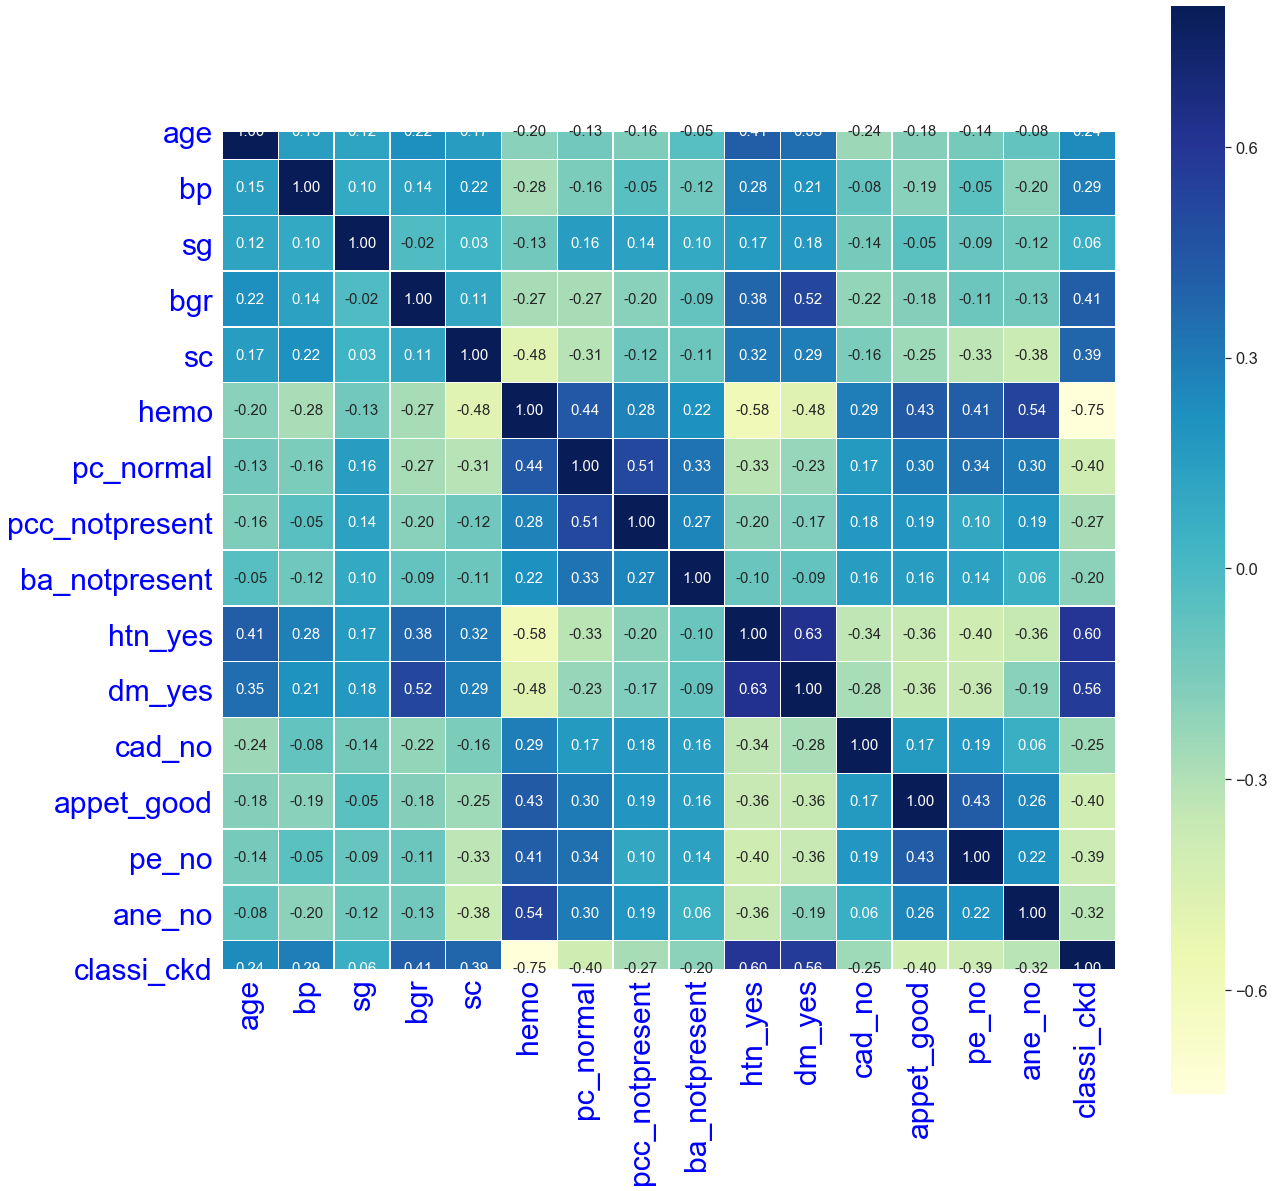

In [32]:
# Creating a correlation matrix
import matplotlib.pylab as pylab
fig = plt.figure(figsize=(20,20))
sns.set(font_scale = 1.5)
healthmat = df_kdny_cat.corr()
sns.heatmap(healthmat, vmax = .8, square = True, annot=True, cmap="YlGnBu", linewidths=.5, fmt='.2f',
                 annot_kws={'size':15},  cbar=True)


plt.xticks(size = 30, color='blue' )
plt.yticks(size = 30, color='blue')


plt.show()

# Data Visualization

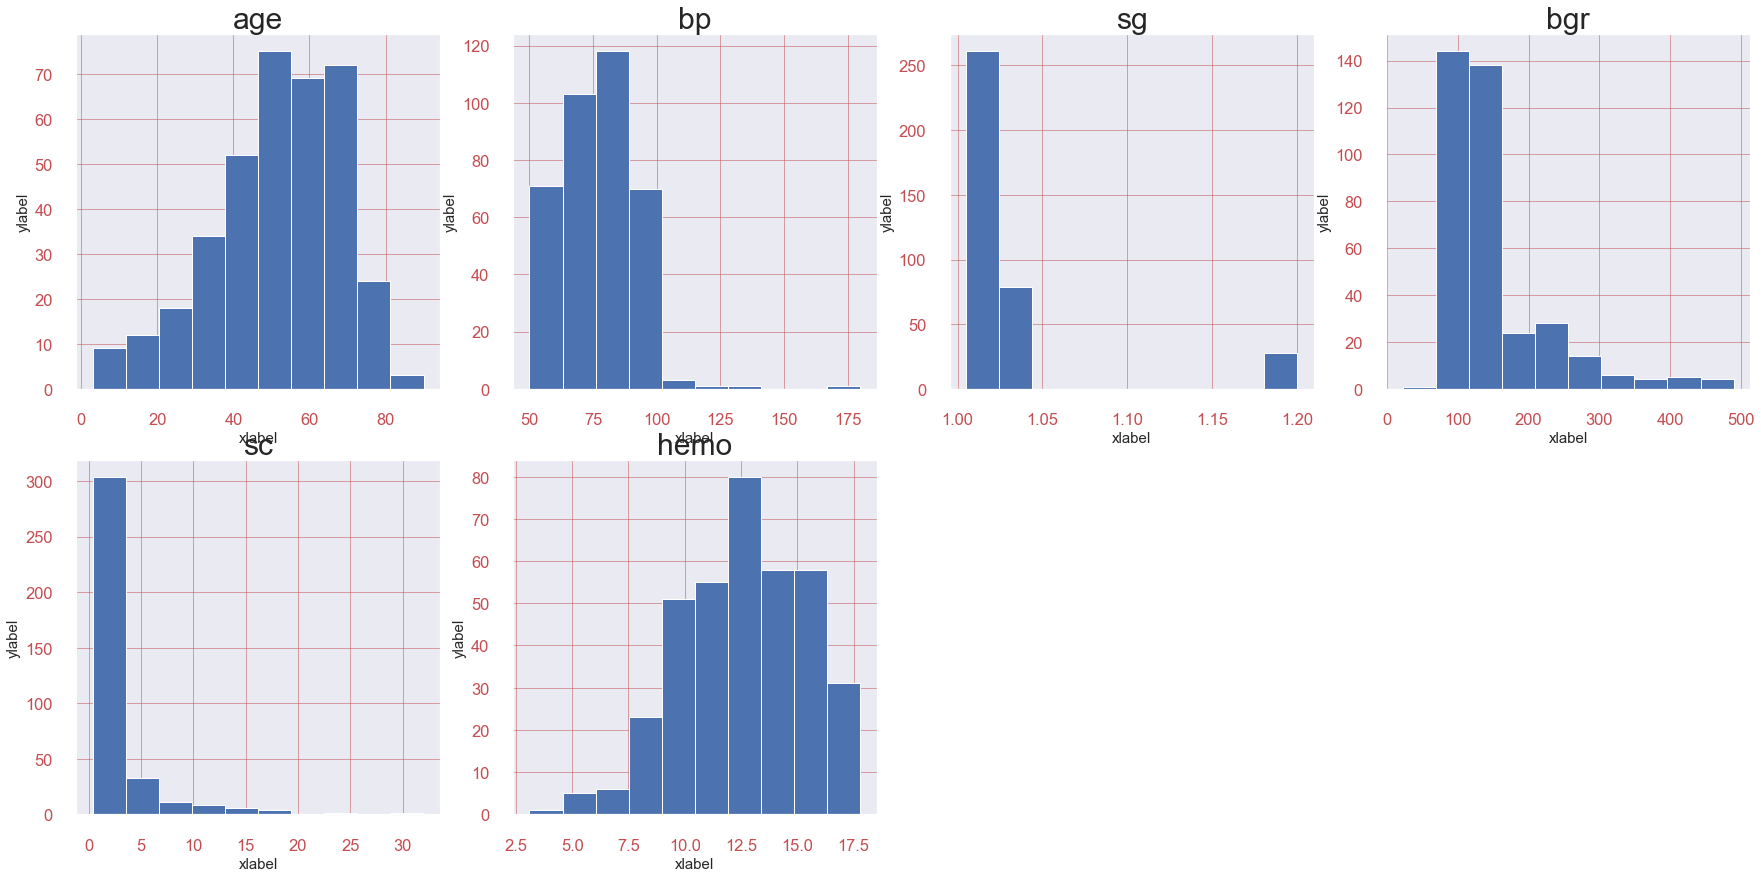

In [33]:
#dic_col = {'age':1, 'bp':2, 'sg':3, 'al':4, 'bgr':5, 'sc':6, 'hemo':7,
#           'pc_normal':8, 'pcc_notpresent':9, 'ba_notpresent':10, 'htn_yes':11,
#           'dm_yes':12, 'cad_no':13, 'appet_good':14, 'pe_no':15, 'ane_no':16, 'classi_ckd':17}
# Create a dictionary of columns.
#dic_col = {'age':1, 'bp':2, 'sg':3, 'al':4, 'bgr':5, 'sc':6, 'hemo':7}
dic_col = {'age':1, 'bp':2, 'sg':3, 'bgr':4, 'sc':5, 'hemo':6}

# Detect outliers in each variable using box plots.
plt.figure(figsize=(30,30))

for variable,i in dic_col.items():
    plt.subplot(4,4,i)
    plt.hist(df_kdny_cat[variable])
  
   
    plt.xlabel('xlabel', fontsize=15)
    plt.ylabel('ylabel', fontsize=15)
    plt.tick_params(direction='out', length=20, width=20, colors='r',
               grid_color='r', grid_alpha=0.5)
    plt.title(variable, size = 30)

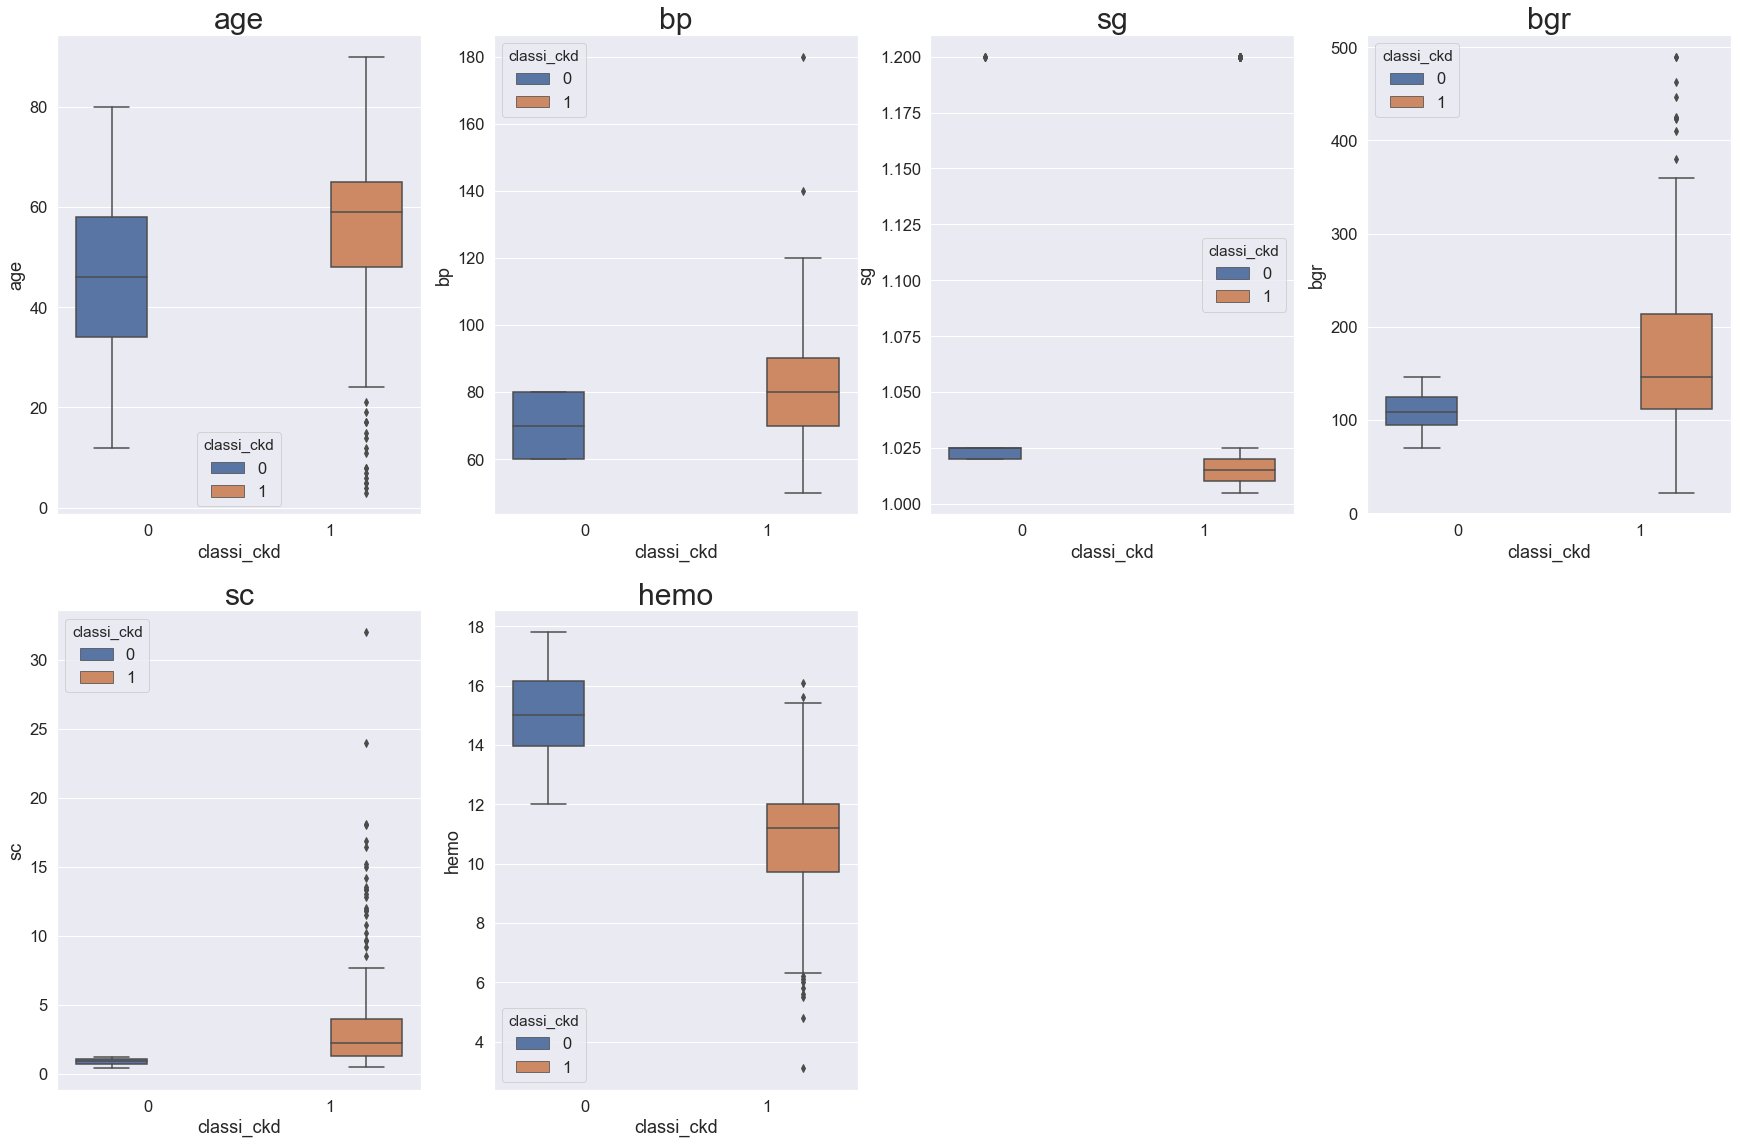

In [34]:
# Create a dictionary of columns.
#dic_col = {'age':1, 'bp':2, 'sg':3, 'al':4, 'bgr':5, 'sc':6, 'hemo':7}
dic_col = {'age':1, 'bp':2, 'sg':3, 'bgr':4, 'sc':5, 'hemo':6}

# Detect outliers in each variable using box plots.
plt.figure(figsize=(30,30))

for variable,i in dic_col.items():
    plt.subplot(3,4,i)
    
    sns.boxplot(x='classi_ckd',y=df_kdny_cat[variable],hue='classi_ckd',data=df_kdny_cat)
    plt.title(variable, size=30)

{'age':1, 'bp':2, 'sg':3, 'al':4, 'bgr':5, 'sc':6, 'hemo':7, 'pc_normal':8, 'pcc_notpresent':9, 
           'ba_notpresent':10, 'htn_yes':11,'dm_yes':12, 'cad_no':13, 'appet_good':14, 'pe_no':15, 'ane_no':16,}

C:\Users\catan\.conda\envs\catanEnv\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


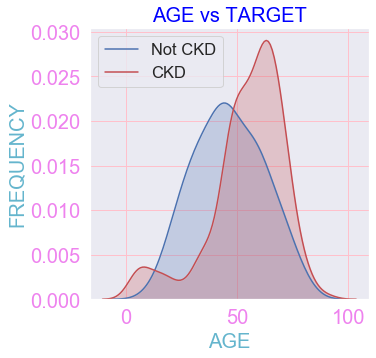

In [35]:
fig = plt.figure(figsize=(5,5))
ax=sns.kdeplot(df_kdny_cat.loc[(df_kdny_cat['classi_ckd'] == 0),'age'] , color='b',shade=True, label='Not CKD')
ax=sns.kdeplot(df_kdny_cat.loc[(df_kdny_cat['classi_ckd'] == 1),'age'] , color='r',shade=True, label='CKD')
#ax.set(xlabel='AGE', ylabel='Frequency')
plt.title('AGE vs TARGET', size=20, color='Blue' )

plt.xlabel('AGE', size = 20, color='c')
plt.ylabel('FREQUENCY', size = 20, color='c' )

plt.xticks(size = 20, color='violet' )
plt.yticks(size = 20, color='violet')
plt.grid(True, color='pink')
plt.show()

C:\Users\catan\.conda\envs\catanEnv\lib\site-packages\IPython\core\pylabtools.py:128: MatplotlibDeprecationWarning: Support for uppercase single-letter colors is deprecated since Matplotlib 3.1 and will be removed in 3.3; please use lowercase instead.
  fig.canvas.print_figure(bytes_io, **kw)


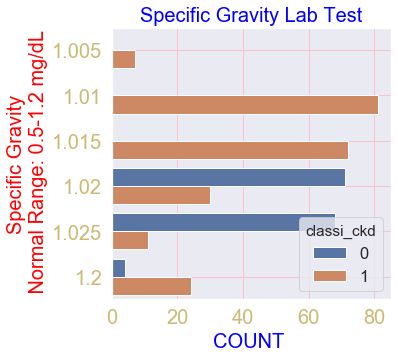

In [36]:
fig = plt.figure(figsize=(5,5))
sns.countplot(y= df_kdny_cat['sg'], hue = df_kdny_cat['classi_ckd'])
plt.title('Specific Gravity Lab Test', size=20, color='Blue' )

plt.xlabel('COUNT ', size = 20, color='Blue')
plt.ylabel('Specific Gravity\n Normal Range: 0.5-1.2 mg/dL', size = 20, color='Red' )

plt.xticks(size = 20, color='Y' )
plt.yticks(size = 20, color='Y')
plt.grid(True, color='pink')
plt.show()


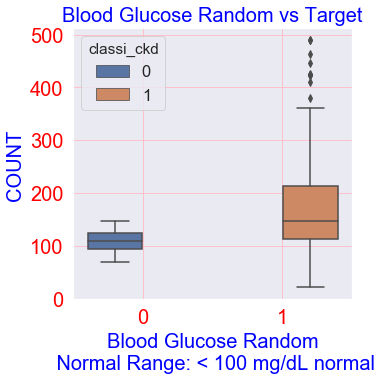

In [37]:
fig = plt.figure(figsize=(5,5))
ax = sns.boxplot(x='classi_ckd',y='bgr',hue='classi_ckd',data=df_kdny_cat)  
plt.title('Blood Glucose Random vs Target', size=20, color='Blue')

plt.ylabel('COUNT ', size = 20, color='Blue')
plt.xlabel('Blood Glucose Random\n Normal Range: < 100 mg/dL normal', size = 20, color='blue' )

plt.xticks(size = 20, color='red' )
plt.yticks(size = 20, color='red')
plt.grid(True, color='pink')
plt.show()

#### Shown in the boxplot is the blood glucose random laboratory test, the normal shown is less than 100 mg/dL. We can see here that the blue one without kidney disease has are mostly w/in the 100 range normal blood glucose test. The orange boxplot has kidney disease has abnormal blood glucose concentrated mostly above 160 and above range.

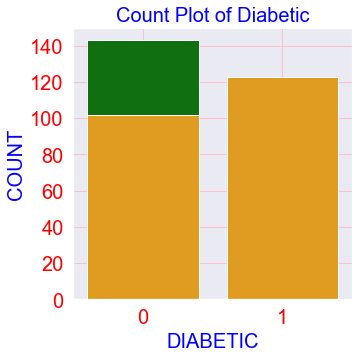

In [38]:
fig = plt.figure(figsize=(5,5))
ax=sns.countplot(df_kdny_cat.loc[(df_kdny_cat['classi_ckd'] == 0),'dm_yes'] , color='green', label='Not CKD')
ax=sns.countplot(df_kdny_cat.loc[(df_kdny_cat['classi_ckd'] == 1),'dm_yes'] , color='orange', label='CKD')
plt.title('Count Plot of Diabetic', size=20, color='Blue' )

plt.xlabel('DIABETIC', size = 20, color='Blue')
plt.ylabel('COUNT', size = 20, color='Blue' )

plt.xticks(size = 20, color='red' )
plt.yticks(size = 20, color='red')
plt.grid(True, color='pink')
plt.show()

#### Shown in the barplot is mostly those patient that are diabetic has kidney disease and most patient that are not diabetic does not have kidney disease and also there are patient that are NOT diabetic but have kidney disease.



In [80]:
df_kdny_cat.head()

,age,bp,sg,bgr,sc,hemo,pc_normal,pcc_notpresent,ba_notpresent,htn_yes,dm_yes,cad_no,appet_good,pe_no,ane_no,classi_ckd
0,48.0,80.0,1.020,121.0,1.2,15.4,1,1,1,1,1,1,1,1,1,1
1,7.0,50.0,1.020,146.0,0.8,11.3,1,1,1,0,0,1,1,1,1,1
2,62.0,80.0,1.010,423.0,1.8,9.6,1,1,1,0,1,1,0,1,0,1
3,48.0,70.0,1.005,117.0,3.8,11.2,0,0,1,1,0,1,0,0,0,1
4,51.0,80.0,1.010,106.0,1.4,11.6,1,1,1,0,0,1,1,1,1,1


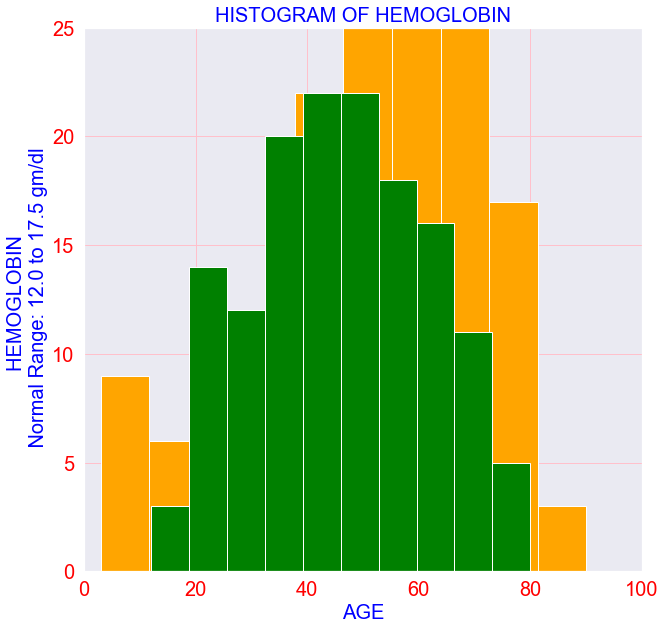

In [85]:


import numpy as np
import matplotlib.pyplot as plt

#fig = plt.figure(figsize=(5,5))
#plt.hist(df_kdny_cat['hemo'], facecolor='g', alpha=0.75)
#plt.title('Histogram of Age', size=20, color='Blue' )

fig = plt.figure(figsize=(10,10))
plt.hist(df_kdny_cat.loc[(df_kdny_cat['classi_ckd'] == 1),'age'] , color='orange', bins=10, label='CKD')
plt.hist(df_kdny_cat.loc[(df_kdny_cat['classi_ckd'] == 0),'age'] , color='green', bins=10, label='NOT_CKD')

plt.title('HISTOGRAM OF HEMOGLOBIN', size=20, color='Blue' )

plt.ylabel('HEMOGLOBIN \n Normal Range: 12.0 to 17.5 gm/dl', size = 20, color='Blue')
plt.xlabel('AGE', size = 20, color='Blue' )
plt.ylim([0, 25])
plt.xlim([0, 100])
plt.xticks(size = 20, color='red' )
plt.yticks(size = 20, color='red')
plt.grid(True, color='pink')
plt.show()





In [40]:
df_kdny_cat.shape

(368, 16)

In [41]:
df_kdny_cat.describe()

,age,bp,sg,bgr,sc,hemo,pc_normal,pcc_notpresent,ba_notpresent,htn_yes,dm_yes,cad_no,appet_good,pe_no,ane_no,classi_ckd
count,368.000000,368.000000,368.000000,368.000000,368.000000,368.000000,368.000000,368.000000,368.000000,368.000000,368.000000,368.000000,368.000000,368.000000,368.000000,368.000000
mean,51.467391,76.483696,1.031304,148.404891,2.644429,12.502174,0.798913,0.883152,0.940217,0.361413,0.334239,0.910326,0.796196,0.809783,0.858696,0.611413
std,16.833664,13.696387,0.048790,75.324741,3.646463,2.738323,0.401359,0.321676,0.237406,0.481064,0.472366,0.286103,0.403374,0.393007,0.348809,0.488093
min,3.000000,50.000000,1.005000,22.000000,0.400000,3.100000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,42.000000,70.000000,1.015000,101.750000,0.900000,10.800000,1.000000,1.000000,1.000000,0.000000,0.000000,1.000000,1.000000,1.000000,1.000000,0.000000
50%,54.000000,80.000000,1.020000,125.000000,1.200000,12.200000,1.000000,1.000000,1.000000,0.000000,0.000000,1.000000,1.000000,1.000000,1.000000,1.000000
75%,64.000000,80.000000,1.025000,153.750000,2.700000,14.800000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
max,90.000000,180.000000,1.200000,490.000000,32.000000,17.800000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


sg = 1.002-1.030

normal albumin 3.4-5.4 g/dL

The normal range for hemoglobin is: For men, 13.5 to 17.5 grams per deciliter. 
For women, 12.0 to 15.5 grams per deciliter.

Normal levels of creatinine in the blood are approximately 0.6 to 1.2 milligrams (mg) per deciliter (dL) in adult males and 0.5 to 1.1 milligrams per deciliter in adult females.

df_kdny_cat['age'] = np.where(df_kdny_cat['age']<= 10, 10, df_kdny_cat['age'])
df_kdny_cat['age'] = np.where(df_kdny_cat['age']>= 65, 65, df_kdny_cat['age'])

df_kdny_cat['bp'] = np.where(df_kdny_cat['bp']<= 65, 65, df_kdny_cat['bp'])
df_kdny_cat['bp'] = np.where(df_kdny_cat['bp']>= 90, 90, df_kdny_cat['bp'])

df_kdny_cat['sg'] = np.where(df_kdny_cat['sg']<= 1.00, 1.00, df_kdny_cat['sg'])
df_kdny_cat['sg'] = np.where(df_kdny_cat['sg']>= 1.04, 1.04, df_kdny_cat['sg'])

#df_kdny_cat['al'] = np.where(df_kdny_cat['al']>= 5, 5, df_kdny_cat['al'])

df_kdny_cat['bgr'] = np.where(df_kdny_cat['bgr']<= 80, 80, df_kdny_cat['bgr'])
df_kdny_cat['bgr'] = np.where(df_kdny_cat['bgr']>= 150, 150, df_kdny_cat['bgr'])

df_kdny_cat['sc'] = np.where(df_kdny_cat['sc']<= 0.4, 0.4, df_kdny_cat['sc'])
df_kdny_cat['sc'] = np.where(df_kdny_cat['sc']>= 1.4, 1.4, df_kdny_cat['sc'])

df_kdny_cat['hemo'] = np.where(df_kdny_cat['hemo']<= 10, 10, df_kdny_cat['hemo'])
df_kdny_cat['hemo'] = np.where(df_kdny_cat['hemo']>= 18, 18, df_kdny_cat['hemo'])





In [42]:
df_kdny_cat.describe()

,age,bp,sg,bgr,sc,hemo,pc_normal,pcc_notpresent,ba_notpresent,htn_yes,dm_yes,cad_no,appet_good,pe_no,ane_no,classi_ckd
count,368.000000,368.000000,368.000000,368.000000,368.000000,368.000000,368.000000,368.000000,368.000000,368.000000,368.000000,368.000000,368.000000,368.000000,368.000000,368.000000
mean,51.467391,76.483696,1.031304,148.404891,2.644429,12.502174,0.798913,0.883152,0.940217,0.361413,0.334239,0.910326,0.796196,0.809783,0.858696,0.611413
std,16.833664,13.696387,0.048790,75.324741,3.646463,2.738323,0.401359,0.321676,0.237406,0.481064,0.472366,0.286103,0.403374,0.393007,0.348809,0.488093
min,3.000000,50.000000,1.005000,22.000000,0.400000,3.100000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,42.000000,70.000000,1.015000,101.750000,0.900000,10.800000,1.000000,1.000000,1.000000,0.000000,0.000000,1.000000,1.000000,1.000000,1.000000,0.000000
50%,54.000000,80.000000,1.020000,125.000000,1.200000,12.200000,1.000000,1.000000,1.000000,0.000000,0.000000,1.000000,1.000000,1.000000,1.000000,1.000000
75%,64.000000,80.000000,1.025000,153.750000,2.700000,14.800000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
max,90.000000,180.000000,1.200000,490.000000,32.000000,17.800000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [43]:
#Cleaning some outliers
#df_kdny_cat = df_kdny_cat[df_kdny_cat['bu']<250]
df_kdny_cat = df_kdny_cat[df_kdny_cat['sc']<20]
df_kdny_cat = df_kdny_cat[df_kdny_cat['hemo']>5]

In [44]:
df_kdny_cat.shape

(364, 16)

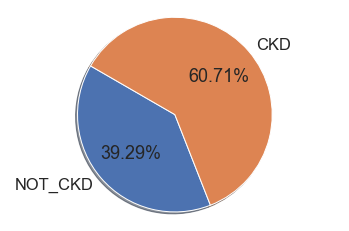

In [45]:
# Creates a pie chart that represents the target categories in our dataset

plt.pie(np.bincount(df_kdny_cat['classi_ckd']), labels=['NOT_CKD', 'CKD'],
        autopct='%3.2f%%', shadow=True, startangle=150)
plt.axis('equal')


plt.xticks(size = 20, color='violet' )
plt.yticks(size = 20, color='violet')

plt.show()

In [46]:
df_kdny_cat['classi_ckd'].value_counts()

1    221
0    143
Name: classi_ckd, dtype: int64

In [47]:
df_kdny_cat.head()

,age,bp,sg,bgr,sc,hemo,pc_normal,pcc_notpresent,ba_notpresent,htn_yes,dm_yes,cad_no,appet_good,pe_no,ane_no,classi_ckd
0,48.0,80.0,1.020,121.0,1.2,15.4,1,1,1,1,1,1,1,1,1,1
1,7.0,50.0,1.020,146.0,0.8,11.3,1,1,1,0,0,1,1,1,1,1
2,62.0,80.0,1.010,423.0,1.8,9.6,1,1,1,0,1,1,0,1,0,1
3,48.0,70.0,1.005,117.0,3.8,11.2,0,0,1,1,0,1,0,0,0,1
4,51.0,80.0,1.010,106.0,1.4,11.6,1,1,1,0,0,1,1,1,1,1


## Logistic Regression

In [48]:
# Declare a logistic regression classifier.
# Parameter regularization coefficient C described above.

from sklearn.linear_model import LogisticRegression
lr = LogisticRegression(C=1e9)#1e9, 1e30
X = df_kdny_cat.iloc[:,:-1]
y = df_kdny_cat['classi_ckd']

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.40)

#Feature Scaling, normalize the values coz some number are very high or low
from sklearn.preprocessing import StandardScaler
sc_X = StandardScaler()
X_train = sc_X.fit_transform(X_train)
X_test = sc_X.transform(X_test)

# Fit the model.
fit = lr.fit(X_train, y_train)

# Display.
print('Coefficients')
print(fit.coef_)
print(fit.intercept_)
lr_pred = lr.predict(X_test)

from sklearn.metrics import accuracy_score, precision_score, recall_score, confusion_matrix
print()
print("Accuracy is {0:.2f}".format(accuracy_score(y_test, lr_pred)))
print("Precision is {0:.2f}".format(precision_score(y_test, lr_pred)))
print("Recall is {0:.2f}".format(recall_score(y_test, lr_pred)))
print()
print(confusion_matrix(y_test, lr_pred))

accuracy_lr = accuracy_score(y_test, lr_pred)
precision_lr = precision_score(y_test, lr_pred)
recall_lr = recall_score(y_test, lr_pred)


#print('\n Accuracy by admission status')
#print(pd.crosstab(lr_pred, y_test))

#print('\n Percentage accuracy')
#print(lr.score(X, y))

Coefficients
[[-16.98680887   6.7748727  -49.97906357  56.22150009 103.05480052
  -41.53074038  -6.23244677  -0.24491817   0.1657705    3.39222394
   47.13988751   5.03756903  -8.09076433 -35.03720191 -10.63157785]]
[107.01344024]

Accuracy is 0.94
Precision is 0.99
Recall is 0.90

[[62  1]
 [ 8 75]]


C:\Users\catan\.conda\envs\catanEnv\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


In [49]:
# Checking the accuracy of our model using cross validation
from sklearn.model_selection import cross_val_score
cross_val_score(lr, X_train, y_train, cv=5).mean()

C:\Users\catan\.conda\envs\catanEnv\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\catan\.conda\envs\catanEnv\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\catan\.conda\envs\catanEnv\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\catan\.conda\envs\catanEnv\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\catan\.conda\envs\catanEnv\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be ch

0.9588794926004228

## Decision Tree

In [50]:
#Splitting the dataset into Training set and Test set
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, confusion_matrix

X = df_kdny_cat.iloc[:,:-1]
y = df_kdny_cat['classi_ckd']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.40, random_state = 20)

dtree =  DecisionTreeClassifier()
dtree.fit(X_train, y_train)

dtree_pred = dtree.predict(X_test)

print(classification_report(y_test, dtree_pred))
print(confusion_matrix(y_test, dtree_pred))

from sklearn.metrics import accuracy_score, precision_score, recall_score
print()
print("Accuracy is {0:.2f}".format(accuracy_score(y_test, dtree_pred)))
print("Precision is {0:.2f}".format(precision_score(y_test, dtree_pred)))
print("Recall is {0:.2f}".format(recall_score(y_test, dtree_pred)))

accuracy_dtree = accuracy_score(y_test, dtree_pred)
precision_dtree = precision_score(y_test, dtree_pred)
recall_dtree = recall_score(y_test, dtree_pred)



              precision    recall  f1-score   support

           0       0.94      0.98      0.96        49
           1       0.99      0.97      0.98        97

    accuracy                           0.97       146
   macro avg       0.97      0.97      0.97       146
weighted avg       0.97      0.97      0.97       146

[[48  1]
 [ 3 94]]

Accuracy is 0.97
Precision is 0.99
Recall is 0.97


In [51]:
# Checking the accuracy of our model using cross validation
from sklearn.model_selection import cross_val_score
cross_val_score(dtree, X_train, y_train, cv=5).mean()

0.930952380952381

## Random Forest

In [52]:
#Test w/o balancing the class
from sklearn.ensemble import RandomForestClassifier
X = df_kdny_cat.iloc[:,:-1]
y = df_kdny_cat['classi_ckd']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.40, random_state = 20)


rfc = RandomForestClassifier(n_estimators=10)
rfc.fit(X_train, y_train)

rfc_pred = rfc.predict(X_test)

from sklearn.metrics import accuracy_score, precision_score, recall_score
print()
print("Accuracy is {0:.2f}".format(accuracy_score(y_test, rfc_pred )))
print("Precision is {0:.2f}".format(precision_score(y_test, rfc_pred)))
print("Recall is {0:.2f}".format(recall_score(y_test, rfc_pred)))
print()
print("Confusion Matrix: \n", confusion_matrix(y_test, rfc_pred))

accuracy_rfc = accuracy_score(y_test, rfc_pred)
precision_rfc = precision_score(y_test, rfc_pred)
recall_rfc = recall_score(y_test, rfc_pred)


Accuracy is 0.99
Precision is 1.00
Recall is 0.99

Confusion Matrix: 
 [[49  0]
 [ 1 96]]


In [53]:
y_test.value_counts()

1    97
0    49
Name: classi_ckd, dtype: int64

In [54]:
# Checking the accuracy of our model using cross validation
from sklearn.model_selection import cross_val_score
cross_val_score(rfc, X_train, y_train, cv=5).mean()

0.9818181818181818

In [55]:
pd.crosstab(pd.Series(y_test, name = 'Actual'), pd.Series(rfc_pred, name = 'Predict'), margins = True)

Predict,0,1,All
Actual,,,
1,24,41,65
All,24,41,65


## KNN

In [56]:
#Splitting the dataset into Training set and Test set 4
X = df_kdny_cat.iloc[:,:-1]
y = df_kdny_cat['classi_ckd']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.40, random_state = 20)


#Feature Scaling, normalize the values coz some number are very high or low 5
from sklearn.preprocessing import StandardScaler
sc_X = StandardScaler()
X_train = sc_X.fit_transform(X_train)
X_test = sc_X.transform(X_test)

# Fitting K-NN to training dataset 6
from sklearn.neighbors import KNeighborsClassifier
knn_cls = KNeighborsClassifier(n_neighbors = 5, metric= 'minkowski', p=2)
knn_cls.fit(X_train, y_train)

#Predicting the Test set results 7
knn_pred = knn_cls.predict(X_test)

#Evaluating the Model by creating confusion matrix 8
from sklearn.metrics import confusion_matrix
#cm = confusion_matrix(y_test, knn_pred)
#print(cm)
print()
from sklearn.metrics import accuracy_score, precision_score, recall_score, confusion_matrix
print("Accuracy is {0:.2f}".format(accuracy_score(y_test, knn_pred)))
print("Precision is {0:.2f}".format(precision_score(y_test, knn_pred)))
print("Recall is {0:.2f}".format(recall_score(y_test, knn_pred)))
print()
print("Confusion Matrix: \n", confusion_matrix(y_test, knn_pred))

accuracy_knn = accuracy_score(y_test, knn_pred)
precision_knn = precision_score(y_test, knn_pred)
recall_knn = recall_score(y_test, knn_pred)




Accuracy is 0.91
Precision is 1.00
Recall is 0.87

Confusion Matrix: 
 [[49  0]
 [13 84]]


In [57]:
# Checking the accuracy of our model using cross validation
from sklearn.model_selection import cross_val_score
cross_val_score(knn_cls, X_train, y_train, cv=5).mean()

0.9082251082251082

## Naive Bayes

In [58]:
#Splitting the dataset into Training set and Test set 4
X = df_kdny_cat.iloc[:,:-1]
y = df_kdny_cat['classi_ckd']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.40, random_state = 20)

# Our data is binary / boolean, so we're importing the Bernoulli classifier.
from sklearn.naive_bayes import BernoulliNB

# Instantiate our model and store it in a new variable.
bnb = BernoulliNB()

# Fit our model to the data.
bnb.fit(X_train, y_train)

# Classify, storing the result in a new variable.
bnb_pred = bnb.predict(X_test)

from sklearn.metrics import accuracy_score, precision_score, recall_score, confusion_matrix
print("Accuracy is {0:.2f}".format(accuracy_score(y_test, bnb_pred)))
print("Precision is {0:.2f}".format(precision_score(y_test, bnb_pred)))
print("Recall is {0:.2f}".format(recall_score(y_test, bnb_pred)))
print()
print("Confusion Matrix: \n", confusion_matrix(y_test, bnb_pred))

accuracy_NB = accuracy_score(y_test, bnb_pred)
precision_NB= precision_score(y_test, bnb_pred)
recall_NB = recall_score(y_test,bnb_pred)



Accuracy is 0.92
Precision is 1.00
Recall is 0.89

Confusion Matrix: 
 [[49  0]
 [11 86]]


In [59]:
# Checking the accuracy of our model using cross validation
from sklearn.model_selection import cross_val_score
cross_val_score(bnb, X_train, y_train, cv=5).mean()

0.9173160173160173

In [60]:
from sklearn.model_selection import cross_val_predict
cross_val_predict(bnb, X_train, y_train, cv=5).mean()

0.48623853211009177

## SVM_Classifier

In [61]:
#Splitting the dataset into Training set and Test set 4
X = df_kdny_cat.iloc[:,:-1]
y = df_kdny_cat['classi_ckd']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.40, random_state = 20)


#Feature Scaling, normalize the values coz some number are very high or low and we are dealing w/ distance
from sklearn.preprocessing import StandardScaler
sc_X = StandardScaler()
X_train = sc_X.fit_transform(X_train)
X_test = sc_X.transform(X_test)

from sklearn.svm import SVC
svc = SVC()
svc.fit(X_train,y_train)

#Predicting the Test set results 
svc_pred = svc.predict(X_test)

from sklearn.metrics import accuracy_score, precision_score, recall_score, confusion_matrix
print("Accuracy is {0:.2f}".format(accuracy_score(y_test, svc_pred)))
print("Precision is {0:.2f}".format(precision_score(y_test, svc_pred)))
print("Recall is {0:.2f}".format(recall_score(y_test, svc_pred)))
print()
print("Confusion Matrix: \n", confusion_matrix(y_test, svc_pred))

accuracy_SVM = accuracy_score(y_test, svc_pred)
precision_SVM = precision_score(y_test, svc_pred)
recall_SVM = recall_score(y_test, svc_pred)




Accuracy is 0.97
Precision is 1.00
Recall is 0.95

Confusion Matrix: 
 [[49  0]
 [ 5 92]]


In [62]:
# Checking the accuracy of our model using cross validation
from sklearn.model_selection import cross_val_score
cross_val_score(svc, X_train, y_train, cv=5).mean()

C:\Users\catan\.conda\envs\catanEnv\lib\site-packages\sklearn\svm\base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)
C:\Users\catan\.conda\envs\catanEnv\lib\site-packages\sklearn\svm\base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)
C:\Users\catan\.conda\envs\catanEnv\lib\site-packages\sklearn\svm\base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)
C:\Users\catan\.conda\envs\catanEnv\lib\site-p

0.9675324675324676

## Gradient Boosting

In [63]:
#Splitting the dataset into Training set and Test set 4
X = df_kdny_cat.iloc[:,:-1]
y = df_kdny_cat['classi_ckd']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.40, random_state = 20)

# We'll make 500 iterations, use 2-deep trees, and set our loss function.
params = {'n_estimators': 500,
          'max_depth': 2,
          'loss': 'deviance'}

# Initialize and fit the model.
gb_clf = ensemble.GradientBoostingClassifier(**params)
gb_clf.fit(X_train, y_train)

predict_train = gb_clf.predict(X_train)
predict_test = gb_clf.predict(X_test)

# Accuracy tables.
table_train = pd.crosstab(y_train, predict_train, margins=True)
table_test = pd.crosstab(y_test, predict_test, margins=True)

train_tI_errors = table_train.loc[0.0,1.0] / table_train.loc['All','All']
train_tII_errors = table_train.loc[1.0,0.0] / table_train.loc['All','All']

test_tI_errors = table_test.loc[0.0,1.0]/table_test.loc['All','All']
test_tII_errors = table_test.loc[1.0,0.0]/table_test.loc['All','All']

print((
    'Training set accuracy:\n'
    'Percent Type I errors: {}\n'
    'Percent Type II errors: {}\n\n'
    'Test set accuracy:\n'
    'Percent Type I errors: {}\n'
    'Percent Type II errors: {}'
).format(train_tI_errors, train_tII_errors, test_tI_errors, test_tII_errors))
print()

from sklearn.metrics import accuracy_score, precision_score, recall_score, confusion_matrix
print("Accuracy is {0:.2f}".format(accuracy_score(y_test, predict_test )))
print("Precision is {0:.2f}".format(precision_score(y_test, predict_test)))
print("Recall is {0:.2f}".format(recall_score(y_test, predict_test)))
print()
print("Confusion Matrix: \n", confusion_matrix(y_test, predict_test))

accuracy_GB = accuracy_score(y_test, predict_test)
precision_GB = precision_score(y_test, predict_test)
recall_GB = recall_score(y_test, predict_test)


Training set accuracy:
Percent Type I errors: 0.0
Percent Type II errors: 0.0

Test set accuracy:
Percent Type I errors: 0.0
Percent Type II errors: 0.02054794520547945

Accuracy is 0.98
Precision is 1.00
Recall is 0.97

Confusion Matrix: 
 [[49  0]
 [ 3 94]]


In [64]:
# Checking the accuracy of our model using cross validation
from sklearn.model_selection import cross_val_score
cross_val_score(gb_clf, X_train, y_train, cv=5).mean()

0.9725108225108225

feature_importance = clf.feature_importances_

# Make importances relative to max importance.
feature_importance = 100.0 * (feature_importance / feature_importance.max())
sorted_idx = np.argsort(feature_importance)
pos = np.arange(sorted_idx.shape[0]) + .5
plt.subplot(1, 2, 2)
plt.barh(pos, feature_importance[sorted_idx], align='center')
plt.yticks(pos, X.columns[sorted_idx], color= 'r')
plt.xlabel('Relative Importance')
plt.title('Variable Importance')
plt.show()

C:\Users\catan\.conda\envs\catanEnv\lib\site-packages\ipykernel_launcher.py:13: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  del sys.path[0]
C:\Users\catan\.conda\envs\catanEnv\lib\site-packages\ipykernel_launcher.py:24: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.


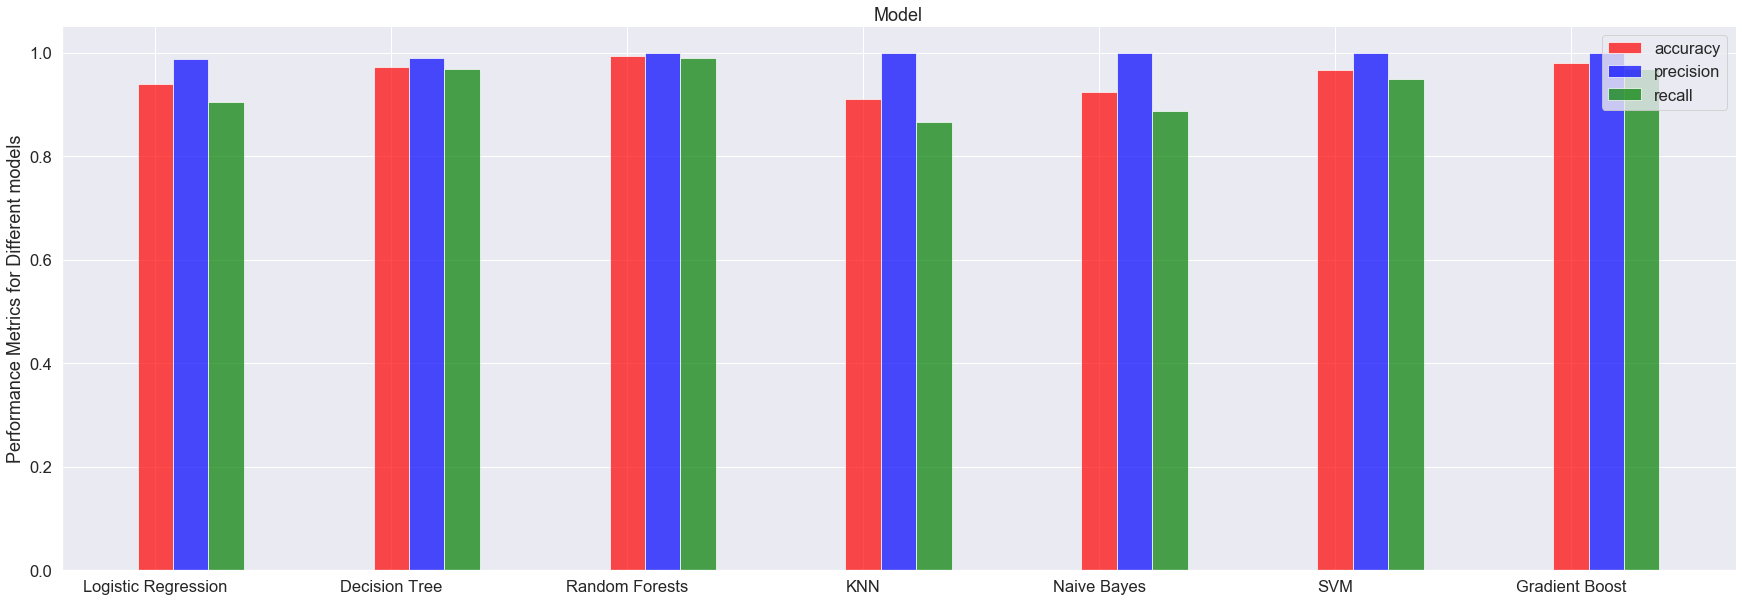

In [65]:
plt.figure(figsize=(30, 10))
ax = plt.subplot(111)

models = ['Logistic Regression', 'Decision Tree', 'Random Forests', 'KNN', 'Naive Bayes', 'SVM', 'Gradient Boost']
values = [accuracy_lr, accuracy_dtree, accuracy_rfc, accuracy_knn, accuracy_NB, accuracy_SVM, accuracy_GB ]
model = np.arange(len(models))

plt.bar(model, values, align='center', width = 0.15, alpha=0.7, color = 'red', label= 'accuracy')
plt.xticks(model, models)
           

           
ax = plt.subplot(111)

models = ['Logistic Regression', 'Decision Tree', 'Random Forests', 'KNN', 'Naive Bayes', 'SVM', 'Gradient Boost']
values = [precision_lr, precision_dtree, precision_rfc, precision_knn, precision_NB, precision_SVM, precision_GB]
model = np.arange(len(models))

plt.bar(model+0.15, values, align='center', width = 0.15, alpha=0.7, color = 'blue', label = 'precision')
plt.xticks(model, models)



ax = plt.subplot(111)

models = ['Logistic Regression', 'Decision Tree', 'Random Forests', 'KNN', 'Naive Bayes', 'SVM', 'Gradient Boost']
values = [recall_lr, recall_dtree, recall_rfc, recall_knn, recall_NB, recall_SVM, recall_GB]
model = np.arange(len(models))

plt.bar(model+0.3, values, align='center', width = 0.15, alpha=0.7, color = 'green', label = 'recall')
plt.xticks(model, models)



plt.ylabel('Performance Metrics for Different models')
plt.title('Model')
    
# removing the axis on the top and right of the plot window
ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)
ax.legend()

plt.show()           

## AdaBoost 

In [66]:
from sklearn.ensemble import AdaBoostClassifier
from sklearn import metrics

#Splitting the dataset into Training set and Test set 4
X = df_kdny_cat.iloc[:,:-1]
y = df_kdny_cat['classi_ckd']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.30, random_state = 20)

model = DecisionTreeClassifier(criterion='entropy', max_depth=1)#estimator, weak learner

AdaBoost = AdaBoostClassifier(base_estimator=model, n_estimators=400, learning_rate=1)

boostmodel = AdaBoost.fit(X_train, y_train)

Ada_pred = boostmodel.predict(X_test)

predictions = metrics.accuracy_score(y_test, Ada_pred)

from sklearn.metrics import accuracy_score, precision_score, recall_score, confusion_matrix
print("Accuracy is {0:.2f}".format(accuracy_score(y_test, Ada_pred)*100, '%'))
print("Precision is {0:.2f}".format(precision_score(y_test, Ada_pred)*100, '%'))
print("Recall is {0:.2f}".format(recall_score(y_test, Ada_pred)*100, '%'))
print()
print("Confusion Matrix: \n", confusion_matrix(y_test, Ada_pred))

accuracy_Ada_pred = accuracy_score(y_test, Ada_pred)
precision_Ada_pred = precision_score(y_test, Ada_pred)
recall_Ada_pred = recall_score(y_test, Ada_pred)



Accuracy is 98.18
Precision is 100.00
Recall is 97.18

Confusion Matrix: 
 [[39  0]
 [ 2 69]]


## Choosing parameters with GridSearchCV with 10-fold cross validations.


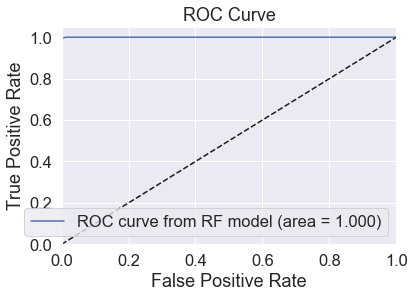

(array([0.        , 0.        , 0.        , 0.        , 0.        ,
        0.01398601, 0.02797203, 0.06993007, 1.        ]),
 array([0.        , 0.86425339, 0.95927602, 0.99095023, 0.99547511,
        1.        , 1.        , 1.        , 1.        ]),
 0.9999683574344208)

In [67]:
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.metrics import roc_curve, auc, confusion_matrix, classification_report,accuracy_score
from sklearn.ensemble import RandomForestClassifier
import warnings
warnings.filterwarnings('ignore')
%matplotlib inline

def auc_scorer(clf, X, y, model): # Helper function to plot the ROC curve
    if model=='RF':
        fpr, tpr, _ = roc_curve(y, clf.predict_proba(X)[:,1])
    elif model=='SVM':
        fpr, tpr, _ = roc_curve(y, clf.decision_function(X))
    roc_auc = auc(fpr, tpr)

    plt.figure()    # Plot the ROC curve
    plt.plot(fpr, tpr, label='ROC curve from '+model+' model (area = %0.3f)' % roc_auc)
    plt.plot([0, 1], [0, 1], 'k--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('ROC Curve')
    plt.legend(loc="lower right")
    plt.show()

    return fpr,tpr,roc_auc

auc_scorer(rfc,X,y,'RF')

Detailed classification report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        39
           1       1.00      1.00      1.00        71

    accuracy                           1.00       110
   macro avg       1.00      1.00      1.00       110
weighted avg       1.00      1.00      1.00       110

Confusion Matrix:
[[39  0]
 [ 0 71]]


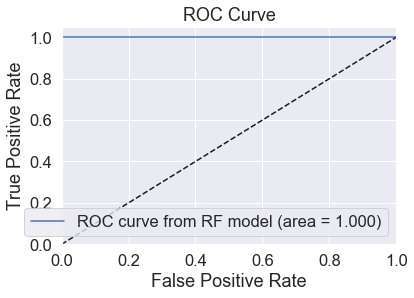

Best parameters:
{'class_weight': None, 'max_depth': 4, 'n_estimators': 15, 'random_state': 20}


In [68]:
tuned_parameters = [{'n_estimators':[7,8,9,10,11,12,13,14,15,16],'max_depth':[2,3,4,5,6,None],
                     'class_weight':[None,{0: 0.33,1:0.67},'balanced'],'random_state':[20]}]
clf = GridSearchCV(RandomForestClassifier(), tuned_parameters, cv=10,scoring='f1')
clf.fit(X_train, y_train)

print("Detailed classification report:")
y_true, rfc_pred  = y_test, clf.predict(X_test) #rfc_pred lr_pred
print(classification_report(y_true, rfc_pred))

confusion = confusion_matrix(y_test, rfc_pred)
print('Confusion Matrix:')
print(confusion)

# Determine the false positive and true positive rates
fpr,tpr,roc_auc = auc_scorer(clf, X_test, y_test, 'RF')

print('Best parameters:')
print(clf.best_params_)
clf_best = clf.best_estimator_


Detailed classification report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        39
           1       1.00      1.00      1.00        71

    accuracy                           1.00       110
   macro avg       1.00      1.00      1.00       110
weighted avg       1.00      1.00      1.00       110

Confusion Matrix:
[[39  0]
 [ 0 71]]


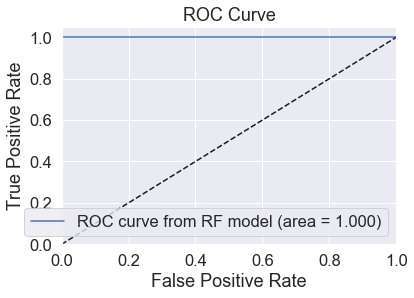

Best parameters:
{'class_weight': None, 'max_depth': 4, 'n_estimators': 15, 'random_state': 20}


In [69]:
tuned_parameters = [{'n_estimators':[7,8,9,10,11,12,13,14,15,16],'max_depth':[2,3,4,5,6,None],
                     'class_weight':[None,{0: 0.33,1:0.67},'balanced'],'random_state':[20]}]
clf = GridSearchCV(RandomForestClassifier(), tuned_parameters, cv=10,scoring='f1')
clf.fit(X_train, y_train)

print("Detailed classification report:")
y_true, lr_pred  = y_test, clf.predict(X_test) #rfc_pred lr_pred
print(classification_report(y_true, lr_pred))

confusion = confusion_matrix(y_test, lr_pred)
print('Confusion Matrix:')
print(confusion)

# Determine the false positive and true positive rates
fpr,tpr,roc_auc = auc_scorer(clf, X_test, y_test, 'RF')

print('Best parameters:')
print(clf.best_params_)
clf_best = clf.best_estimator_


## Examine feature importance
pruned the forest (*max_depth*=2) and decrease the number of trees (*n_estimators*=8), not all features are used.

Text(0.5, 1.0, 'Feature Importance')

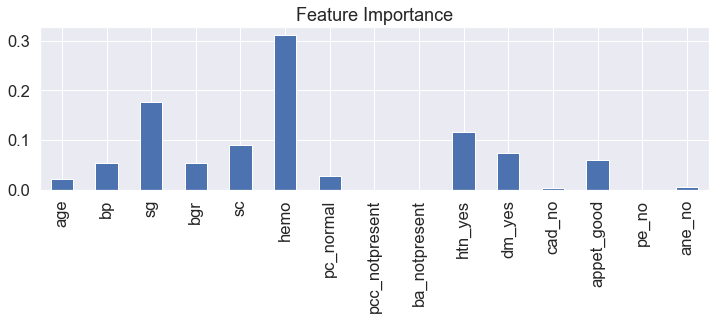

In [70]:
X = df_kdny_cat.iloc[:,:-1]
y = df_kdny_cat['classi_ckd']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.30, random_state = 10)


plt.figure(figsize=(12,3))
features = X_test.columns.values.tolist()
importance = clf_best.feature_importances_.tolist()
feature_series = pd.Series(data=importance,index=features)
feature_series.plot.bar()
plt.title('Feature Importance')

### `Conclusion:`

##### The result of ensemble algorithms Random forest and Gradient Boosting has the highest accuracy, precision and recall. The ensemble algorithm is compose of multiple algorithm that is main purpose is to increase accuracy. But for me I  pick the Random Forest(RF) for  their ability to limit overfitting without substantially increasing error due to bias  why they are such powerful models. One way Random Forests reduce variance is by training on different samples of the data or from different random trees. 